### Import Libraries 

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.model_selection import train_test_split


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


import warnings
warnings.filterwarnings('ignore')


### Read, analyze and preprocess data 

In [2]:
address="F:\Tutorials\Certified program in MACHINE LEARNING and ARTIFICIAL INTELLIGENCE\Dataset_20220919\diabetes.csv"
data=pd.read_csv(address)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
####  Split to feature matrix and label 

y=data.Outcome
X=data.drop(columns=['Outcome'])

#### find number of  zeros  in each column

In [7]:
feat_data=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
count=[]
for col in feat_data:
    count.append((X[col]==0).sum())
pd.DataFrame(count,feat_data).rename(columns ={0:'N_zeros'})

,N_zeros
Pregnancies,111
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0


In [8]:
#### replace zeros with mean 
X.replace(0,X.mean(axis=0),inplace=True)
df=X.join(y)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000000,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1.000000,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8.000000,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,3.845052,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


#### Check for outliers

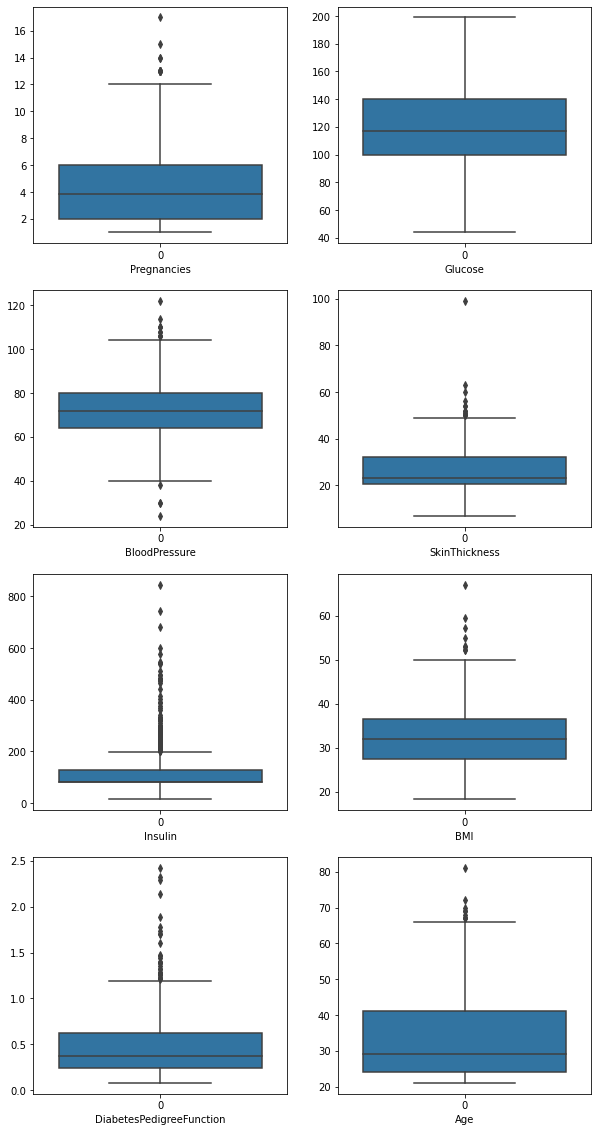

In [9]:
#check for outliers
feat_data=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

f = plt.figure(figsize=(10,20))
for i in range(8):
    f.add_subplot(4, 2, i+1)
    sns.boxplot(data=X[feat_data[i]])
    plt.xlabel(feat_data[i])
plt.show()

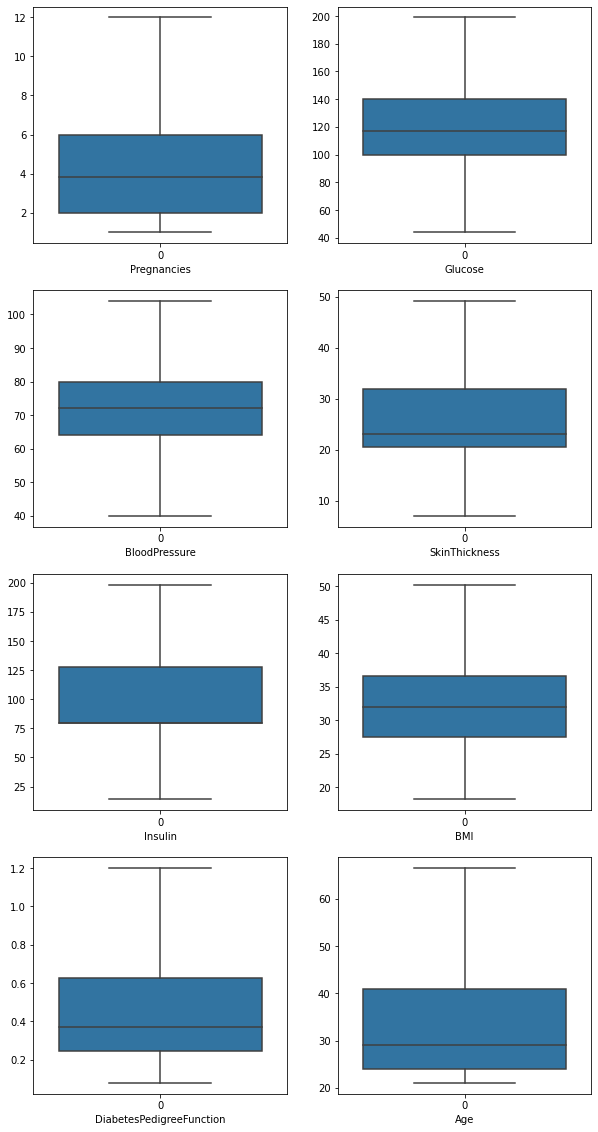

In [10]:
#### remove outliers

for col in feat_data:
    q1=X[col].quantile(0.25)
    q3=X[col].quantile(0.75)
    iqr=q3-q1
    min_val=q1-1.5*iqr
    max_val=q3+1.5*iqr
    
    X[col] = np.where(X[col]>max_val, max_val,X[col])
    X[col] = np.where(X[col]<min_val, min_val,X[col])
    
f = plt.figure(figsize=(10,20))
for i in range(8):
    f.add_subplot(4, 2, i+1)
    sns.boxplot(data=X[feat_data[i]])
    plt.xlabel(feat_data[i])
plt.show()    

#### scale data


In [11]:
def scale_std(X_train,X_test):
    sc = StandardScaler()
    sc.fit(X_train)
    X_train_std = sc.transform(X_train)
    X_test_std = sc.transform(X_test)
    return X_train_std,X_test_std
 

#### Correlation

<AxesSubplot:>

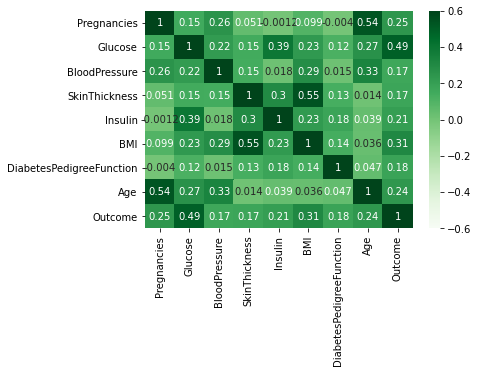

In [12]:
df=X.join(y)
corrMatrix=df.corr()
corrMatrix
plt.subplot()
sns.heatmap(corrMatrix,annot=True,cmap='Greens',vmax=0.6,vmin=-0.6)

In [13]:
Xnew=X.copy()
Xnew.drop(columns=['Age','SkinThickness'],inplace=True)

### Train Test Split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(Xnew,y, test_size=0.20, random_state=42)

print(f'The training dataset has {len(X_train)} records.')
print(f'The testing dataset has {len(X_test)} records.')

The training dataset has 614 records.
The testing dataset has 154 records.


In [15]:
X_train_std,X_test_std=scale_std(X_train,X_test)

#### models=[LR, SVM, KNN, DT, RF, LR_bagging, SVM_bagging, KNN_bagging, DT_bagging, RF_bagging, Adaboost, Gradient_boost]

In [16]:
def plot_conf(ypred,y_test):
    cf_matrix = confusion_matrix( ypred,y_test)
    ax= plt.subplot()
    sns.heatmap(cf_matrix,annot=True,ax=ax, cmap="BuPu")
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')



In [17]:
def acc_model(model,X_train,y_train,X_test,y_test):
    model.fit(X_train, y_train)
    ypred=model.predict(X_test)
    err=accuracy_score(y_test, ypred)
    print('{}% of the test samples are corrrectly classified \n\n'.format(err*100))
    plt.figure()
    plot_conf(ypred,y_test)
    
    return err

### model1-Logistic Regression

77.27272727272727% of the test samples are corrrectly classified 


78.57142857142857% of the test samples are corrrectly classified 




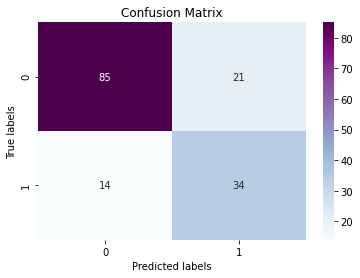

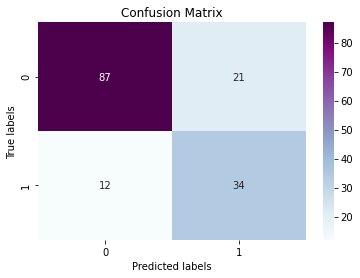

In [18]:
model=LogisticRegression()

err11=acc_model(model,X_train,y_train,X_test,y_test) # LOGISTIC REGRESSION without scaling
err12=acc_model(model,X_train_std,y_train,X_test_std,y_test) # LOGISTIC REGRESSION with scaling


### model2- Support Vector Machine

78.57142857142857% of the test samples are corrrectly classified 


79.22077922077922% of the test samples are corrrectly classified 




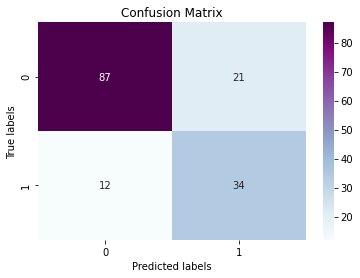

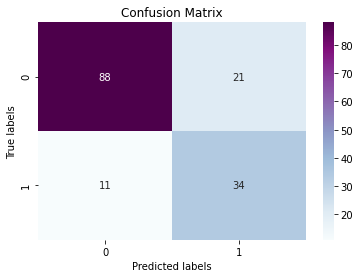

In [19]:
model=SVC(kernel= 'linear', random_state=42, C=0.1)

err21=acc_model(model,X_train,y_train,X_test,y_test) # SVM without scaling
err22=acc_model(model,X_train_std,y_train,X_test_std,y_test) # SVM with scaling


### model3- KNN 

In [20]:
# Finding the best k value
def knn_best(X_train,y_train,X_test,y_test):
    err=[]
    for k in range(1,30):
        neigh = KNeighborsClassifier(n_neighbors=k)
        modelKNN=neigh.fit(X_train,y_train)
        ypred=modelKNN.predict(X_test)
        acc=accuracy_score(y_test, ypred)
        err.append(1-acc)
    plt.figure(dpi=100)
    plt.plot(range(1,30),err)
    plt.xlabel('k--->')
    plt.ylabel('error--->')

    k=err.index(min(err))+1
    print('Best k:',k)
    return k



Best k: 19
Best k: 15


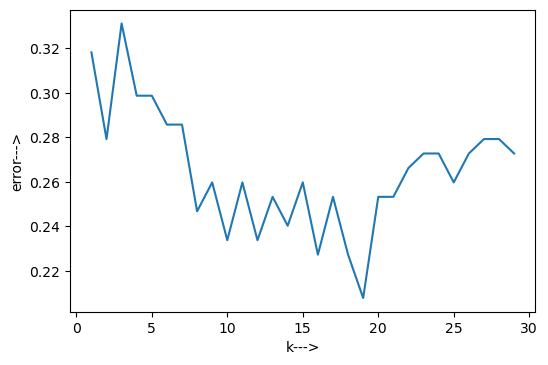

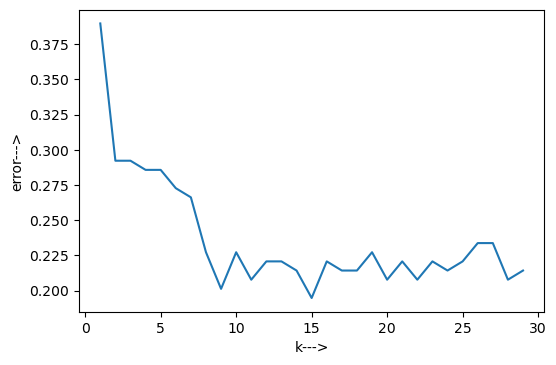

In [21]:
k1=knn_best(X_train,y_train,X_test,y_test)
k2=knn_best(X_train_std,y_train,X_test_std,y_test)

79.22077922077922% of the test samples are corrrectly classified 


80.51948051948052% of the test samples are corrrectly classified 




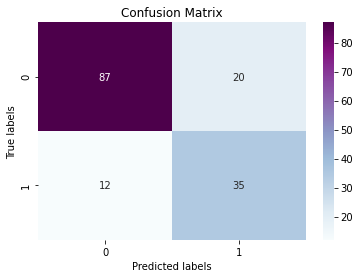

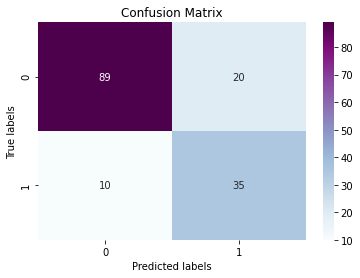

In [22]:

model=KNeighborsClassifier(n_neighbors=k1)
err31=acc_model(model,X_train,y_train,X_test,y_test)# KNN without scaling

model=KNeighborsClassifier(n_neighbors=k2)
err32=acc_model(model,X_train_std,y_train,X_test_std,y_test)# KNN with scaling


### model4- DecisionTree 

69.48051948051948% of the test samples are corrrectly classified 


70.12987012987013% of the test samples are corrrectly classified 




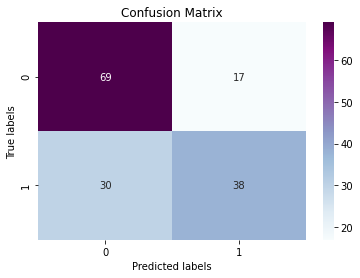

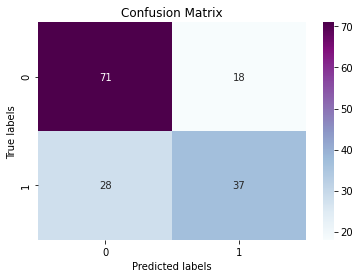

In [23]:
model=DecisionTreeClassifier()

err41=acc_model(model,X_train,y_train,X_test,y_test) #DT without scaling
err42=acc_model(model,X_train_std,y_train,X_test_std,y_test) # DT with scaling


### model5- RandomForest 

76.62337662337663% of the test samples are corrrectly classified 


76.62337662337663% of the test samples are corrrectly classified 




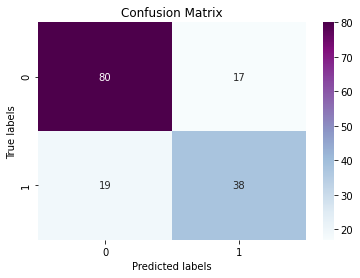

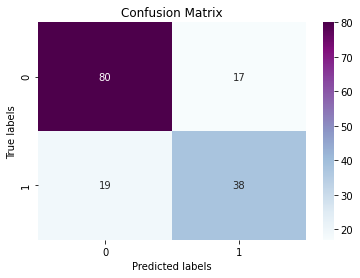

In [24]:
model=RandomForestClassifier(n_estimators=100, random_state=42)

err51=acc_model(model,X_train,y_train,X_test,y_test)         #RF without scaling
err52=acc_model(model,X_train_std,y_train,X_test_std,y_test) # RF with scaling


## Ensemble Learning

### model6- Logistic Regression+Bagging 

77.27272727272727% of the test samples are corrrectly classified 


78.57142857142857% of the test samples are corrrectly classified 




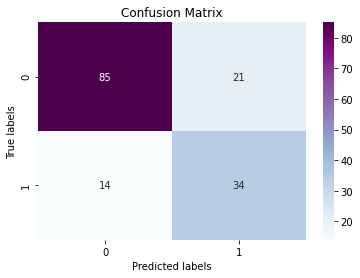

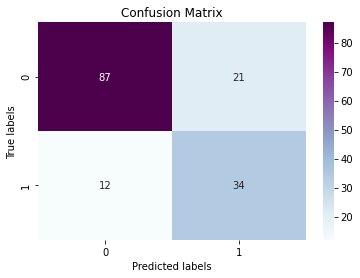

In [25]:
model=BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=100, random_state=42)

err61=acc_model(model,X_train,y_train,X_test,y_test)         # without scaling
err62=acc_model(model,X_train_std,y_train,X_test_std,y_test) #  with scaling


### model 7- SVM+Bagging 

79.22077922077922% of the test samples are corrrectly classified 


79.22077922077922% of the test samples are corrrectly classified 




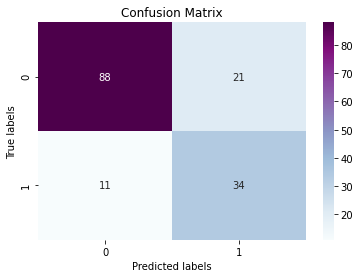

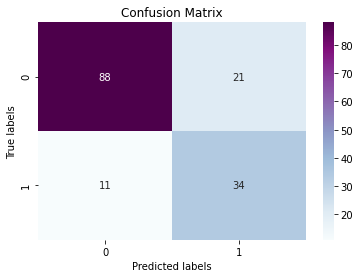

In [26]:
model=BaggingClassifier(base_estimator=SVC(C=0.1,kernel='linear'), n_estimators=100, random_state=42)

err71=acc_model(model,X_train,y_train,X_test,y_test)         # without scaling
err72=acc_model(model,X_train_std,y_train,X_test_std,y_test) #  with scaling


### model 8- KNN + Bagging 

74.67532467532467% of the test samples are corrrectly classified 


79.22077922077922% of the test samples are corrrectly classified 




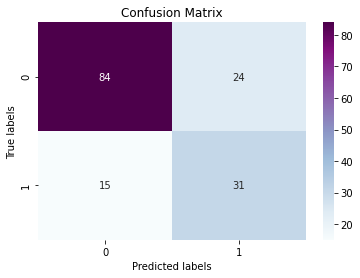

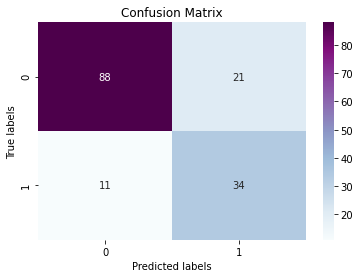

In [27]:

model1=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=19), n_estimators=100, random_state=42)
model2=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=15), n_estimators=100, random_state=42)

err81=acc_model(model1,X_train,y_train,X_test,y_test)         # without scaling
err82=acc_model(model,X_train_std,y_train,X_test_std,y_test) #  with scaling


### model 9- DecisionTree+Bagging 

74.67532467532467% of the test samples are corrrectly classified 


74.67532467532467% of the test samples are corrrectly classified 




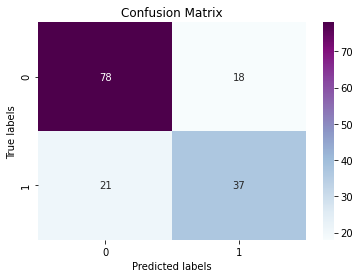

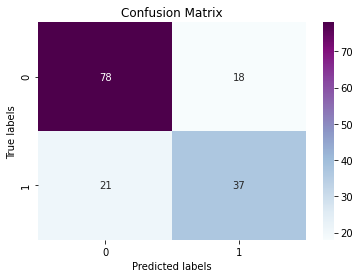

In [28]:
model=BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)

err91=acc_model(model,X_train,y_train,X_test,y_test)         # without scaling
err92=acc_model(model,X_train_std,y_train,X_test_std,y_test) #  with scaling


### model 10- RandomForest+ Bagging 

75.97402597402598% of the test samples are corrrectly classified 


75.97402597402598% of the test samples are corrrectly classified 




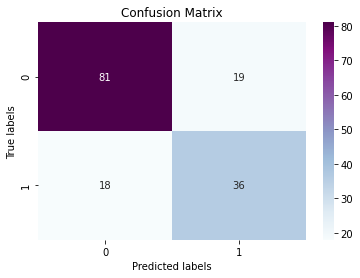

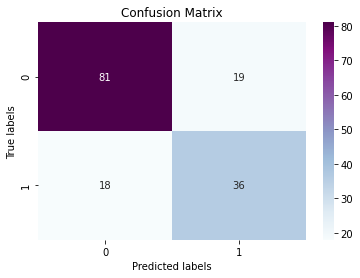

In [29]:
model=BaggingClassifier(base_estimator=RandomForestClassifier(n_estimators=100, random_state=42),
                        n_estimators=100, random_state=42)

err101=acc_model(model,X_train,y_train,X_test,y_test)         # without scaling
err102=acc_model(model,X_train_std,y_train,X_test_std,y_test) #  with scaling



### model 11-Adaboost classifier 

72.72727272727273% of the test samples are corrrectly classified 


72.72727272727273% of the test samples are corrrectly classified 




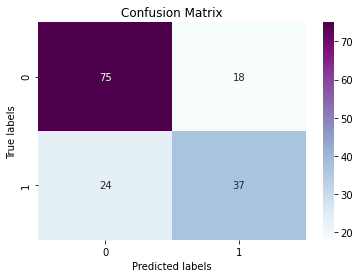

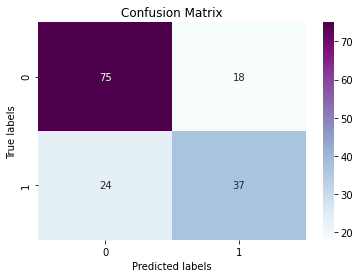

In [30]:
model=AdaBoostClassifier(n_estimators=100)

err111=acc_model(model,X_train,y_train,X_test,y_test)         # without scaling
err112=acc_model(model,X_train_std,y_train,X_test_std,y_test) #  with scaling


### model 12- GradientBoostingClassifier

75.32467532467533% of the test samples are corrrectly classified 


75.32467532467533% of the test samples are corrrectly classified 




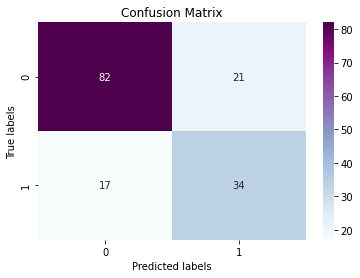

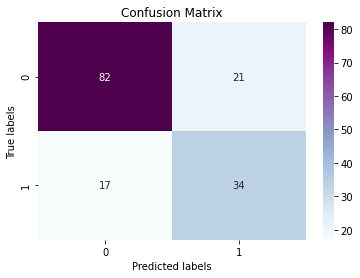

In [31]:
model=GradientBoostingClassifier(n_estimators=100)

err121=acc_model(model,X_train,y_train,X_test,y_test)         # without scaling
err122=acc_model(model,X_train_std,y_train,X_test_std,y_test) #  with scaling


In [39]:
models=['LR', 'SVM', 'KNN', 'DT', 'RF', 'LR_bagging', 'SVM_bagging', 'KNN_bagging', 'DT_bagging', 'RF_bagging', 'Adaboost', 'Gradient_boost']
accuracy_without_scaling=[err11,err21,err31,err41,err51,err61,err71,err81,err91,err101,err111,err121]
accuracy_with_scaling=[err12,err22,err32,err42,err52,err62,err72,err82,err92,err102,err112,err122]

result_list = pd.DataFrame(np.column_stack([models, 
                                           [x * 100 for x in accuracy_without_scaling], 
                                           [x * 100 for x in accuracy_with_scaling]]), 
                               columns=['Classifier', 'accuracy_without_scaling', 'accuracy_with_scaling'])
result_list.set_index('Classifier')

,accuracy_without_scaling,accuracy_with_scaling
Classifier,,
LR,77.27272727272727,78.57142857142857
SVM,78.57142857142857,79.22077922077922
KNN,79.22077922077922,80.51948051948052
DT,69.48051948051948,70.12987012987013
RF,76.62337662337663,76.62337662337663
LR_bagging,77.27272727272727,78.57142857142857
SVM_bagging,79.22077922077922,79.22077922077922
KNN_bagging,74.67532467532467,79.22077922077922
DT_bagging,74.67532467532467,74.67532467532467


In [40]:
result_list.sort_values(by=['accuracy_with_scaling'],ascending=False).set_index('Classifier')


,accuracy_without_scaling,accuracy_with_scaling
Classifier,,
KNN,79.22077922077922,80.51948051948052
SVM,78.57142857142857,79.22077922077922
SVM_bagging,79.22077922077922,79.22077922077922
KNN_bagging,74.67532467532467,79.22077922077922
LR,77.27272727272727,78.57142857142857
LR_bagging,77.27272727272727,78.57142857142857
RF,76.62337662337663,76.62337662337663
RF_bagging,75.97402597402598,75.97402597402598
Gradient_boost,75.32467532467533,75.32467532467533
